#### Download Data



In [ ]:
# Download CDL ZIP files for 2020–2024
!wget https://www.nass.usda.gov/Research_and_Science/Cropland/Release/datasets/2019_30m_cdls.zip -O cdl_2019.zip
!wget https://www.nass.usda.gov/Research_and_Science/Cropland/Release/datasets/2020_30m_cdls.zip -O cdl_2020.zip
!wget https://www.nass.usda.gov/Research_and_Science/Cropland/Release/datasets/2021_30m_cdls.zip -O cdl_2021.zip
!wget https://www.nass.usda.gov/Research_and_Science/Cropland/Release/datasets/2022_30m_cdls.zip -O cdl_2022.zip
!wget https://www.nass.usda.gov/Research_and_Science/Cropland/Release/datasets/2023_30m_cdls.zip -O cdl_2023.zip
# !wget https://www.nass.usda.gov/Research_and_Science/Cropland/Release/datasets/2024_30m_cdls.zip -O cdl_2024.zip

# Unzip CDL files
!unzip -q cdl_2019.zip -d cdl_2019
!unzip -q cdl_2020.zip -d cdl_2020
!unzip -q cdl_2021.zip -d cdl_2021
!unzip -q cdl_2022.zip -d cdl_2022
!unzip -q cdl_2023.zip -d cdl_2023
# !unzip -q cdl_2024.zip -d cdl_2024


--2025-06-05 21:43:40--  https://www.nass.usda.gov/Research_and_Science/Cropland/Release/datasets/2019_30m_cdls.zip
Resolving www.nass.usda.gov (www.nass.usda.gov)... 20.140.48.70, 2001:489a:3103::5a0
Connecting to www.nass.usda.gov (www.nass.usda.gov)|20.140.48.70|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1964882898 (1.8G) [application/zip]
Saving to: ‘cdl_2019.zip’

cdl_2019.zip        100%[===================>]   1.83G  15.0MB/s    in 2m 22s  

2025-06-05 21:46:02 (13.2 MB/s) - ‘cdl_2019.zip’ saved [1964882898/1964882898]

--2025-06-05 21:46:03--  https://www.nass.usda.gov/Research_and_Science/Cropland/Release/datasets/2020_30m_cdls.zip
Resolving www.nass.usda.gov (www.nass.usda.gov)... 20.140.56.69, 2001:489a:3403::5e6
Connecting to www.nass.usda.gov (www.nass.usda.gov)|20.140.56.69|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2007640337 (1.9G) [application/zip]
Saving to: ‘cdl_2020.zip’

cdl_2020.zip        100%[========

#### Import

In [ ]:
!pip install pystac-client
!pip install shapely
!pip install rasterio
!pip install stackstac
!pip install rioxarray
!pip install cartopy
!pip install geemap
!pip install localtileserver

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.8/206.8 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 68.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.3/64.3 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 91.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 41.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 91.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 79.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 269.0/269.0 kB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.2/195.2 k

In [ ]:
import geopandas as gpd
import rasterio
from rasterio.mask import mask
from rasterio.features import shapes
from shapely.geometry import shape
import numpy as np
import matplotlib.pyplot as plt
import os

import pandas as pd
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import stackstac
import xarray as xr

import rasterio
from rasterio.enums import Resampling
from rasterio.transform import Affine
import os
import geemap
import ee

In [ ]:
ee.Authenticate()
ee.Initialize(project='static-potion-450322-u2') # this is the project for Ag Genius for porter.olson11@gmail.com

#### Downsample

In [ ]:
!apt update && apt install -y gdal-bin
!gdalwarp --version

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,740 kB]
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [9,008 kB]
Get:13 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1

In [ ]:
import subprocess
import rasterio
import numpy as np
import os

# === CONFIG ===
geojson_path = "/content/top_200_filtered.geojson"
reprojected_geojson = "/content/top_200_filtered_5070.geojson"
output_folder = "final_tiffs"
wheat_classes = [24, 26, 36]
res = "0.004491556"  # EE-compatible 500m resolution in degrees
years = range(2019, 2024)

# === Step 1: Reproject GeoJSON to match CDL CRS for gdalwarp ===
subprocess.run([
    "ogr2ogr",
    "-t_srs", "EPSG:4326",  # EE-compatible CRS
    reprojected_geojson,
    geojson_path
], check=True)

# === Step 2: Create output folder ===
os.makedirs(output_folder, exist_ok=True)

# === Step 3: Process each year ===
for year in years:
    print(f"📦 Processing {year}...")

    input_tif = f"cdl_{year}/{year}_30m_cdls.tif"
    warped_tif = f"cdl_{year}_top150_500m_temp.tif"
    output_tif = os.path.join(output_folder, f"cdl_{year}_wheat_only_500m.tif")

    # Step 3a: Warp, clip, reproject, and downsample to MODIS-compatible grid
    subprocess.run([
        "gdalwarp",
        "-cutline", reprojected_geojson,
        "-crop_to_cutline",
        "-dstnodata", "0",
        "-of", "GTiff",
        "-r", "mode",  # categorical resampling
        "-t_srs", "EPSG:4326",
        "-tr", res, res,
        "-tap",  # align pixels to grid
        input_tif,
        warped_tif
    ], check=True)

    print(f"✅ Warped + clipped + resampled: {warped_tif}")

    # Step 3b: Filter to wheat classes only
    with rasterio.open(warped_tif) as src:
        data = src.read(1)
        profile = src.profile

        filtered = np.where(np.isin(data, wheat_classes), 1, 0).astype(np.uint8)

        profile.update({
            "dtype": "uint8",
            "compress": "lzw"
        })

        with rasterio.open(output_tif, 'w', **profile) as dst:
            dst.write(filtered, 1)

    print(f"✅ Final saved: {output_tif}\n")

    # Optional: clean up intermediate file
    os.remove(warped_tif)


📦 Processing 2019...
✅ Warped + clipped + resampled: cdl_2019_top150_500m_temp.tif
✅ Final saved: final_tiffs/cdl_2019_wheat_only_500m.tif

📦 Processing 2020...
✅ Warped + clipped + resampled: cdl_2020_top150_500m_temp.tif
✅ Final saved: final_tiffs/cdl_2020_wheat_only_500m.tif

📦 Processing 2021...
✅ Warped + clipped + resampled: cdl_2021_top150_500m_temp.tif
✅ Final saved: final_tiffs/cdl_2021_wheat_only_500m.tif

📦 Processing 2022...
✅ Warped + clipped + resampled: cdl_2022_top150_500m_temp.tif
✅ Final saved: final_tiffs/cdl_2022_wheat_only_500m.tif

📦 Processing 2023...
✅ Warped + clipped + resampled: cdl_2023_top150_500m_temp.tif
✅ Final saved: final_tiffs/cdl_2023_wheat_only_500m.tif



In [ ]:
# import subprocess
# import rasterio
# import numpy as np
# import os

# # === CONFIG ===
# geojson_path = "/content/top_150_filtered.geojson"
# reprojected_geojson = "/content/top_150_filtered_5070.geojson"
# output_folder = "final_tiffs"
# wheat_classes = [24, 26, 36]
# res = "0.0045"  # degrees ≈ 500m
# years = range(2019, 2025)

# # === Step 1: Reproject GeoJSON to match CDL CRS ===
# subprocess.run([
#     "ogr2ogr",
#     "-t_srs", "EPSG:5070",  # CDL CRS
#     reprojected_geojson,
#     geojson_path
# ], check=True)

# # === Step 2: Create output folder ===
# os.makedirs(output_folder, exist_ok=True)

# # === Step 3: Process each year ===
# for year in years:
#     print(f"📦 Processing {year}...")

#     input_tif = f"cdl_{year}/{year}_30m_cdls.tif"
#     warped_tif = f"cdl_{year}_top150_500m_temp.tif"
#     output_tif = os.path.join(output_folder, f"cdl_{year}_wheat_only_500m.tif")

#     # Step 3a: Warp, clip, reproject, and downsample
#     subprocess.run([
#         "gdalwarp",
#         "-cutline", reprojected_geojson,
#         "-crop_to_cutline",
#         "-dstnodata", "0",
#         "-of", "GTiff",
#         "-r", "mode",
#         "-t_srs", "EPSG:4326",
#         "-tr", res, res,
#         input_tif,
#         warped_tif
#     ], check=True)

#     print(f"✅ Warped + clipped + resampled: {warped_tif}")

#     # Step 3b: Filter to wheat classes only
#     with rasterio.open(warped_tif) as src:
#         data = src.read(1)
#         profile = src.profile

#         filtered = np.where(np.isin(data, wheat_classes), data, 0).astype(np.uint8)

#         profile.update({
#             "dtype": "uint8",
#             "compress": "lzw"
#         })

#         with rasterio.open(output_tif, 'w', **profile) as dst:
#             dst.write(filtered, 1)

#     print(f"✅ Final saved: {output_tif}\n")

#     # Optional: clean up intermediate file
#     os.remove(warped_tif)


📦 Processing 2019...
✅ Warped + clipped + resampled: cdl_2019_top150_500m_temp.tif
✅ Final saved: final_tiffs/cdl_2019_wheat_only_500m.tif

📦 Processing 2020...
✅ Warped + clipped + resampled: cdl_2020_top150_500m_temp.tif
✅ Final saved: final_tiffs/cdl_2020_wheat_only_500m.tif

📦 Processing 2021...
✅ Warped + clipped + resampled: cdl_2021_top150_500m_temp.tif
✅ Final saved: final_tiffs/cdl_2021_wheat_only_500m.tif

📦 Processing 2022...
✅ Warped + clipped + resampled: cdl_2022_top150_500m_temp.tif
✅ Final saved: final_tiffs/cdl_2022_wheat_only_500m.tif

📦 Processing 2023...
✅ Warped + clipped + resampled: cdl_2023_top150_500m_temp.tif
✅ Final saved: final_tiffs/cdl_2023_wheat_only_500m.tif

📦 Processing 2024...
✅ Warped + clipped + resampled: cdl_2024_top150_500m_temp.tif
✅ Final saved: final_tiffs/cdl_2024_wheat_only_500m.tif



#### Plotting to check if right

In [ ]:
import geopandas as gpd

gdf = gpd.read_file("/content/top_200_filtered.geojson")
print(gdf.columns)


Index(['GEO_ID', 'STATE', 'COUNTY', 'NAME', 'LSAD', 'CENSUSAREA', 'id',
       'geometry'],
      dtype='object')


In [ ]:
# Pad and combine to form 5-digit FIPS
gdf["GEOID"] = gdf["STATE"].astype(str).str.zfill(2) + gdf["COUNTY"].astype(str).str.zfill(3)


In [ ]:
# Check for any suspicious counties (e.g., San Diego)
print(gdf[gdf["NAME"].str.contains("San Diego", case=False)])

# See which states are included
print(gdf["STATE"].unique())  # or use .value_counts() to see how many from each


Empty GeoDataFrame
Columns: [GEO_ID, STATE, COUNTY, NAME, LSAD, CENSUSAREA, id, geometry, GEOID]
Index: []
['16' '17' '20' '21' '24' '26' '29' '30' '31' '39' '40' '37' '48' '53'
 '55' '18' '47' '41' '46']


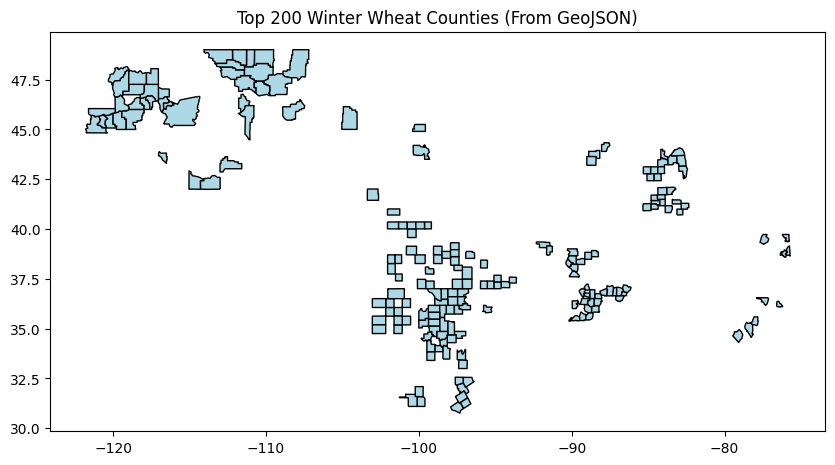

In [ ]:
# Plot the counties you’re using
import geopandas as gpd
import matplotlib.pyplot as plt

gdf = gpd.read_file("/content/top_200_filtered.geojson")
gdf.plot(figsize=(10, 10), edgecolor='black', facecolor='lightblue')
plt.title("Top 200 Winter Wheat Counties (From GeoJSON)")
plt.show()


<ipython-input-14-4be411e5cf1f>:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("YlGn", 3)  # 3 wheat classes


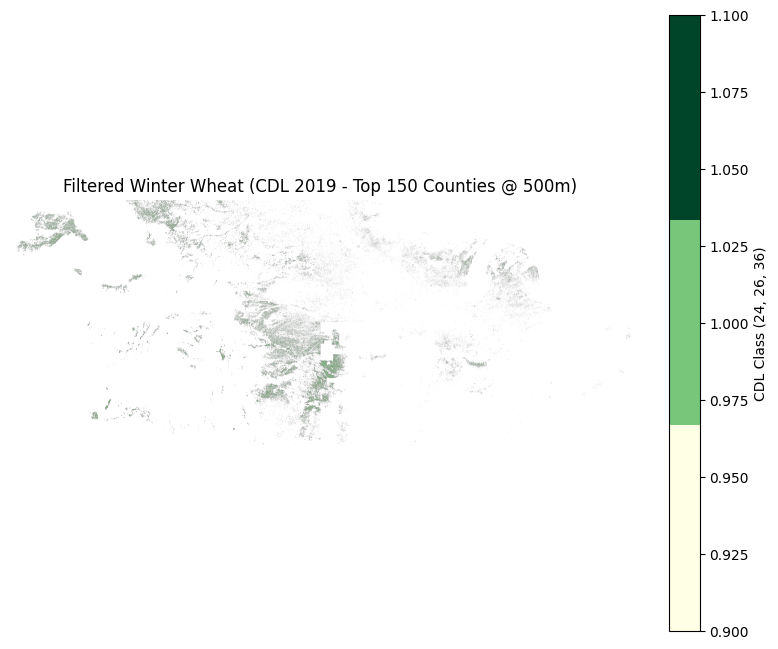

In [ ]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np

# File path
tif_path = "/content/final_tiffs/cdl_2019_wheat_only_500m.tif"

# Load and plot
with rasterio.open(tif_path) as src:
    data = src.read(1)
    bounds = src.bounds

# Set 0 to transparent
masked = np.ma.masked_where(data == 0, data)

plt.figure(figsize=(10, 8))
cmap = plt.cm.get_cmap("YlGn", 3)  # 3 wheat classes

# Plot raster
im = plt.imshow(masked, cmap=cmap)
plt.title("Filtered Winter Wheat (CDL 2019 - Top 150 Counties @ 500m)")
plt.colorbar(im, label="CDL Class (24, 26, 36)")
plt.axis("off")
plt.show()


/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_1_states_provinces_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


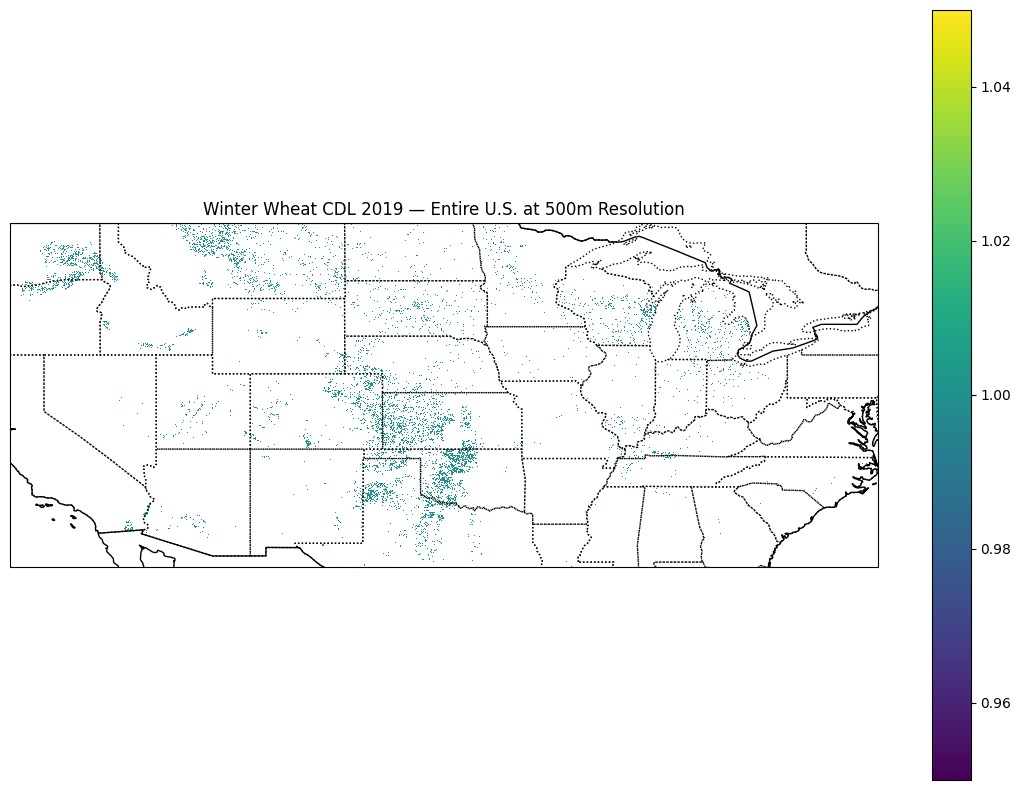

In [ ]:
import rioxarray as rxr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load the GeoTIFF with CRS support
raster = rxr.open_rasterio("/content/final_tiffs/cdl_2019_wheat_only_500m.tif", masked=True).squeeze()

# Create a plot for the full US extent
fig, ax = plt.subplots(figsize=(14, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot the raster
raster.plot.imshow(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap="viridis",
    add_colorbar=True
)

# Add contextual features
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.STATES, linestyle=':')
ax.add_feature(cfeature.COASTLINE)

plt.title("Winter Wheat CDL 2019 — Entire U.S. at 500m Resolution")
plt.show()


/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_1_states_provinces_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


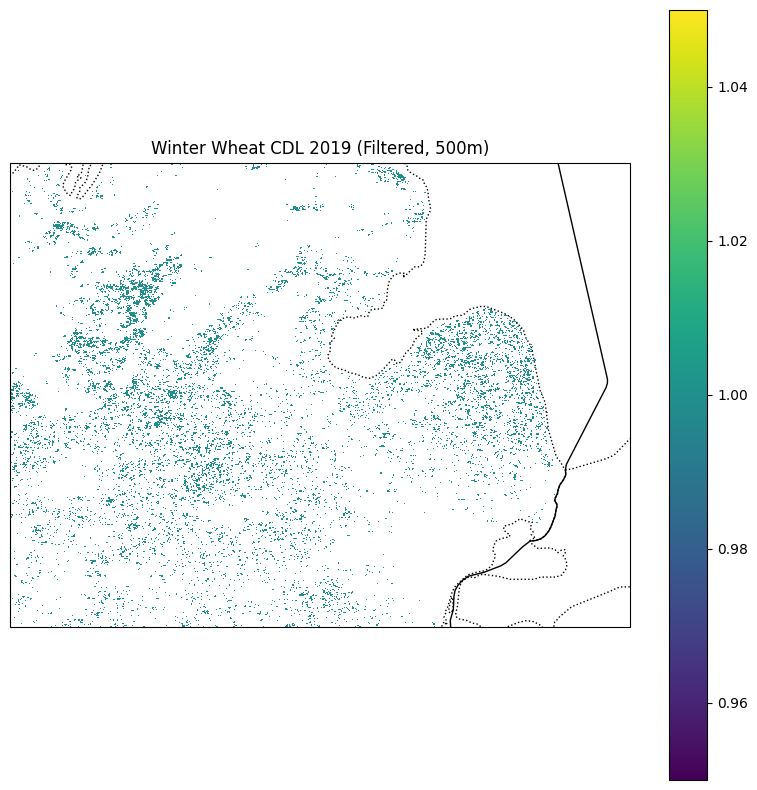

In [ ]:
import rioxarray as rxr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load the GeoTIFF with CRS support
raster = rxr.open_rasterio("/content/final_tiffs/cdl_2019_wheat_only_500m.tif", masked=True).squeeze()

# Create a plot with geographic context
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot the data with cartopy-aware transform
raster.plot.imshow(ax=ax, transform=ccrs.PlateCarree(), cmap="viridis", add_colorbar=True)

# Add state borders and coastlines
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.STATES, linestyle=':')
ax.add_feature(cfeature.COASTLINE)

# Zoom in on Michigan-ish
ax.set_extent([-86, -82, 42, 45])  # [west, east, south, north]

plt.title("Winter Wheat CDL 2019 (Filtered, 500m)")
plt.show()


In [ ]:
import rasterio
import numpy as np

with rasterio.open("/content/cdl_2019_wheat_only_500m.tif") as src:
    data = src.read(1)
    unique_vals = np.unique(data)
    print("Unique values in raster:", unique_vals)


Unique values in raster: [ 0 24 26 36]
